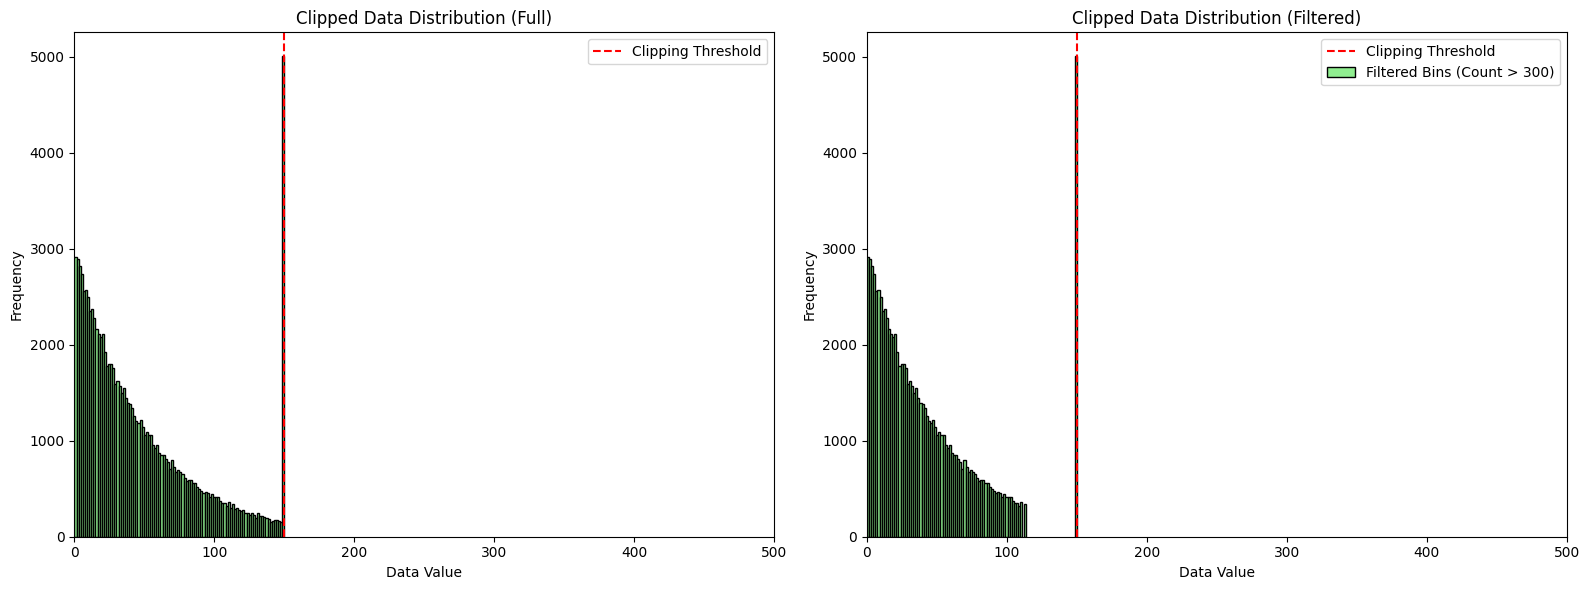

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate a larger dataset from a heavier-tailed exponential distribution
# so we can definitely see values above 250
size = 100_000
data = np.random.exponential(scale=50, size=size)

# Define a clipping threshold
clip_threshold = 150



# Clip the data
clipped_data = np.minimum(data, clip_threshold)

# Create figure with two subplots: before and after clipping
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot original data distribution
axes[0].hist(data, bins=100, color='skyblue', edgecolor='black')
axes[0].axvline(clip_threshold, color='red', linestyle='--', label='Clipping Threshold')
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Data Value')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 500)  # Focus on 0-500 range for clarity
axes[0].legend()

# Plot clipped data distribution
axes[1].hist(clipped_data, bins=100, color='lightgreen', edgecolor='black')
axes[1].axvline(clip_threshold, color='red', linestyle='--', label='Clipping Threshold')
axes[1].set_title('Clipped Data Distribution')
axes[1].set_xlabel('Data Value')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 500)
axes[1].legend()

# Find the maximum frequency in the clipped histogram to position the annotation
max_freq = max(np.histogram(clipped_data, bins=100)[0])
axes[1].annotate(
    'Bunched Values\n(Potential Inference Target)',
    xy=(clip_threshold, max_freq),
    xytext=(clip_threshold - 50, max_freq * 0.7),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='black'
)

plt.tight_layout()
plt.show()


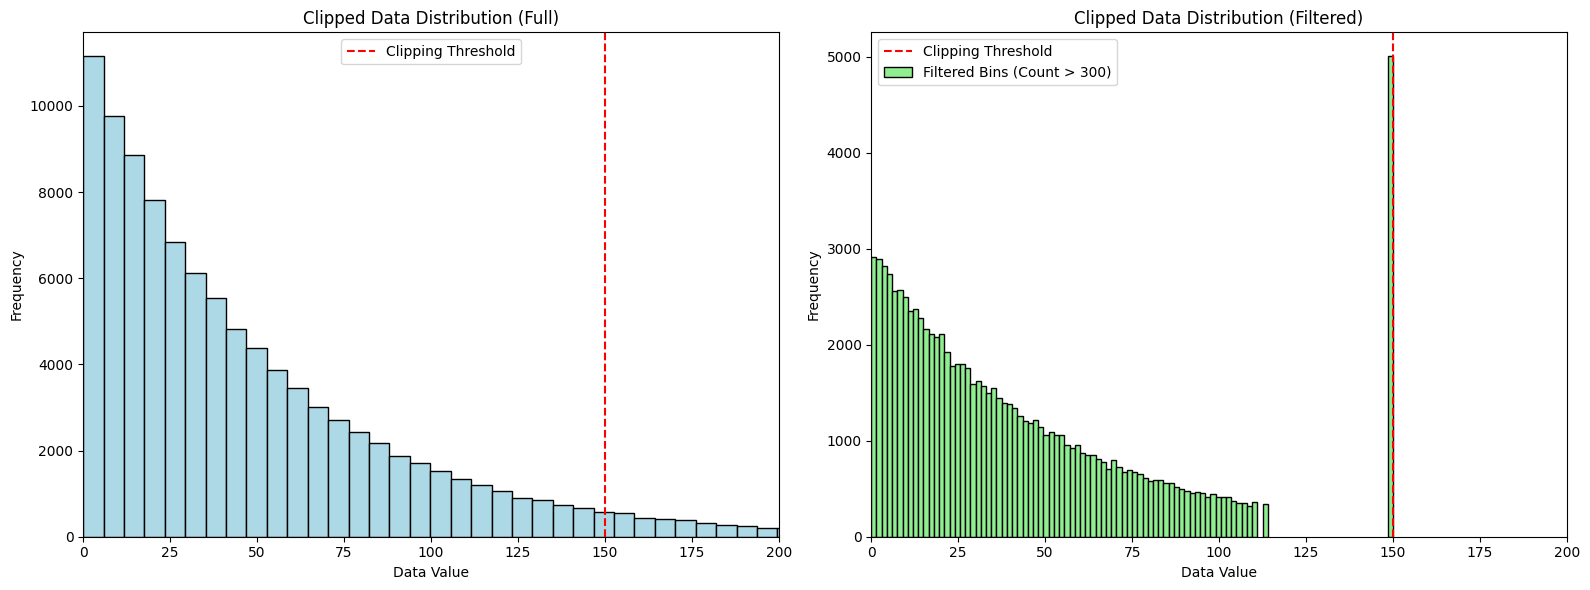

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate a larger dataset from a heavy-tailed exponential distribution
size = 100_000
data = np.random.exponential(scale=50, size=size)

# Define the clipping threshold and clip the data
clip_threshold = 150
clipped_data = np.minimum(data, clip_threshold)

# Compute histogram counts and bin edges for the clipped data
num_bins = 100
counts, bin_edges = np.histogram(clipped_data, bins=num_bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Filter bins where the count is greater than 300
mask = counts > 300
filtered_counts = counts[mask]
filtered_bin_centers = bin_centers[mask]

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original Clipped Data Distribution
axes[0].hist(data, bins=num_bins, color='lightblue', edgecolor='black')
axes[0].axvline(clip_threshold, color='red', linestyle='--', label='Clipping Threshold')
axes[0].set_title('Clipped Data Distribution (Full)')
axes[0].set_xlabel('Data Value')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 200)
axes[0].legend()

# Plot 2: Filtered Histogram (Only Bins with Count > 300)
bar_width = bin_edges[1] - bin_edges[0]
axes[1].bar(filtered_bin_centers, filtered_counts, width=bar_width,
            color='lightgreen', edgecolor='black', label='Filtered Bins (Count > 300)')
axes[1].axvline(clip_threshold, color='red', linestyle='--', label='Clipping Threshold')
axes[1].set_title('Clipped Data Distribution (Filtered)')
axes[1].set_xlabel('Data Value')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 200)
axes[1].legend()

plt.tight_layout()
plt.show()
